In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.0/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TXRlRG1thigGWGYGgEV3")
project = rf.workspace("amine2").project("face-recognition-qnb8a-hruwi")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-recognition-1 in yolov11:: 100%|██████████| 5378/5378 [00:00<00:00, 9047.80it/s]


In [ ]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n.pt data= /content/face-recognition-1/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/face-recognition-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,


image 1/1 /content/face-recognition-1/test/images/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg: 640x640 1 Asim, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


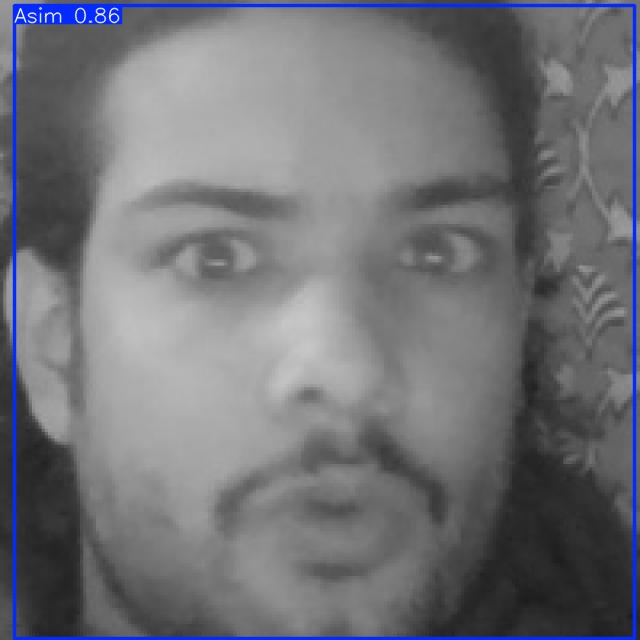

In [ ]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a pretrained YOLO detection model
# model.train(data='/content/detection_matricule-1/data.yaml', epochs=100)  # train the model
results = model('/content/face-recognition-1/test/images/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg', save=True)  # predict on an image
# prompt: show me this img : results = model('/content/face-recognition-1/test/images/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg', save=True)

from IPython.display import Image
Image('/content/runs/detect/predict/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg')

In [ ]:
# prompt: show me this img : results = model('/content/face-recognition-1/test/images/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg', save=True)

from IPython.display import Image
Image('/content/runs/detect/predict/Asim-1000_jpg.rf.fb17cb9fda270a6cf6b6bf87ccc4c2aa.jpg')
